In [10]:
# import libraries 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#reading data

df = pd.read_csv(r'C:\Users\utpis\Downloads\movies.csv')

In [12]:
#diving into the data 

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [16]:
#check if any missing data 
#lots of ways to do this but using for loop 

for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%' .format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [26]:
# For purpose of this analysis, lets drop the nulls
df = df.dropna()

In [22]:
for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%' .format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [28]:
# understand data types for the columns 

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [32]:
# update the data type for the columns
df['budget'] = df['budget'].astype('int64')

In [34]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497.0,20th Century Studios,100.0


In [46]:
# since there are multiple data columns, for this project, lets consider released as the year the movie was release. We will extract the year from this column
df['released_year'] = df['released'].str.extract(r'(\d{4})')

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,"June 13,",1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,"July 2,",1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,"June 20,",1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,"July 2,",1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,"July 25,",1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244.0,Columbia Pictures,124.0,January,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683.0,Paramount Pictures,99.0,February,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753.0,Universal Pictures,101.0,January,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497.0,20th Century Studios,100.0,February,2020


In [48]:
#arrange the data by descending order
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct,released_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162.0,December,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181.0,April 26,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.201647e+09,Twentieth Century Fox,194.0,December,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138.0,December,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149.0,April 27,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5.073000e+03,Two Prong Lesson,96.0,January,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2.970000e+03,Trimark Pictures,97.0,"June 4,",1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2.554000e+03,Copperheart Entertainment,108.0,"May 11,",2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2.270000e+03,Embassy Pictures,85.0,March 12,1982


In [52]:
#look at all the data for analysis
pd.set_option('display.max_rows', None)

In [54]:
#check for duplicates 
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [56]:
# what things are most related to gross revenue so will check what variables will impact gross revenue. I will start with budget 
# company will high impact  

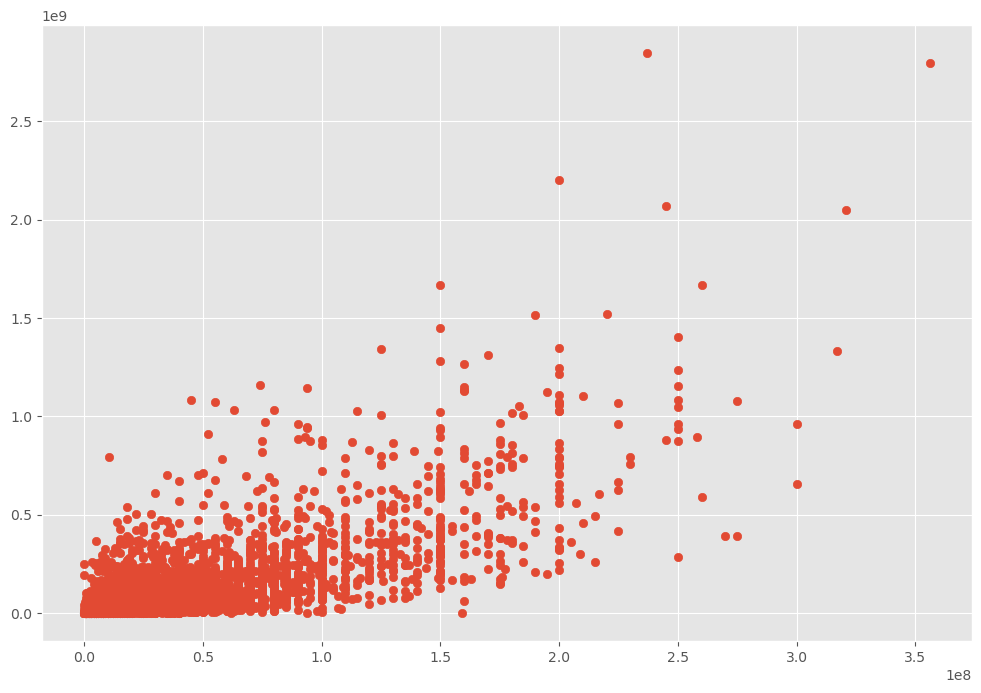

In [58]:
#scatter plot with budget vs gross revenue 

plt.scatter(x=df['budget'], y=df['gross'])
plt.show()b

In [62]:
#the above chart is hard to understand whats going on
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,"June 13,",1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,"July 2,",1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,"June 20,",1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,"July 2,",1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,"July 25,",1980


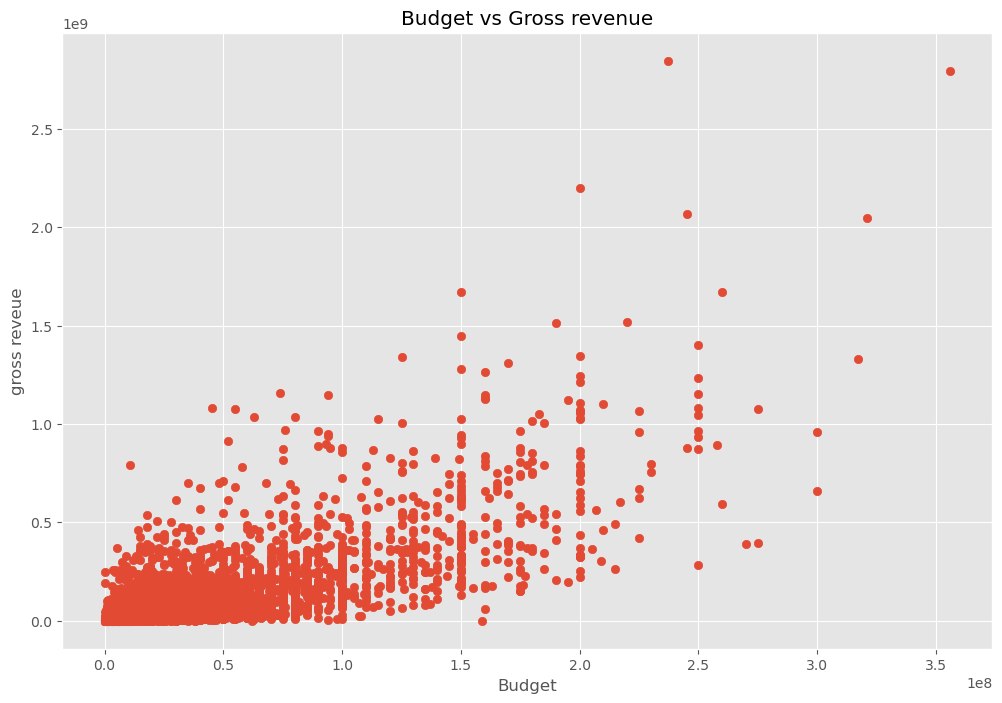

In [64]:
plt.scatter(x=df['budget'], y=df['gross'])

plt.title ('Budget vs Gross revenue')
plt.xlabel('Budget')
plt.ylabel('gross reveue')
plt.show()

In [74]:
!pip install seaborn

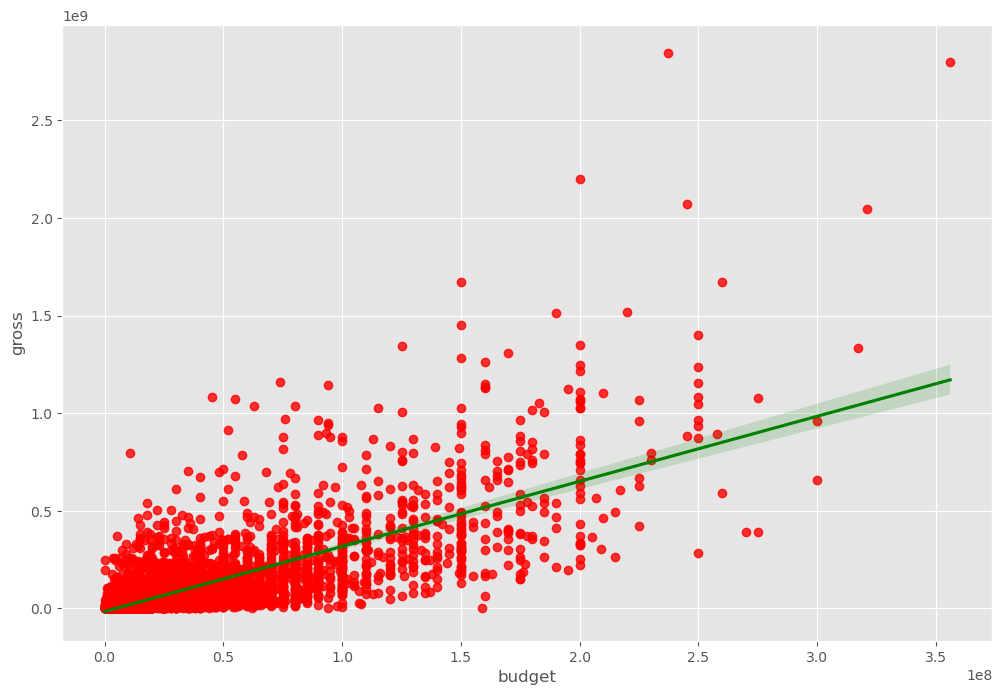

In [86]:
#determine if the above chart is correlated 
# use regplot to plot the budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"green"})
plt.show()

In [90]:
#determin what the correlation is 
#by default we use pearson correlation
df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


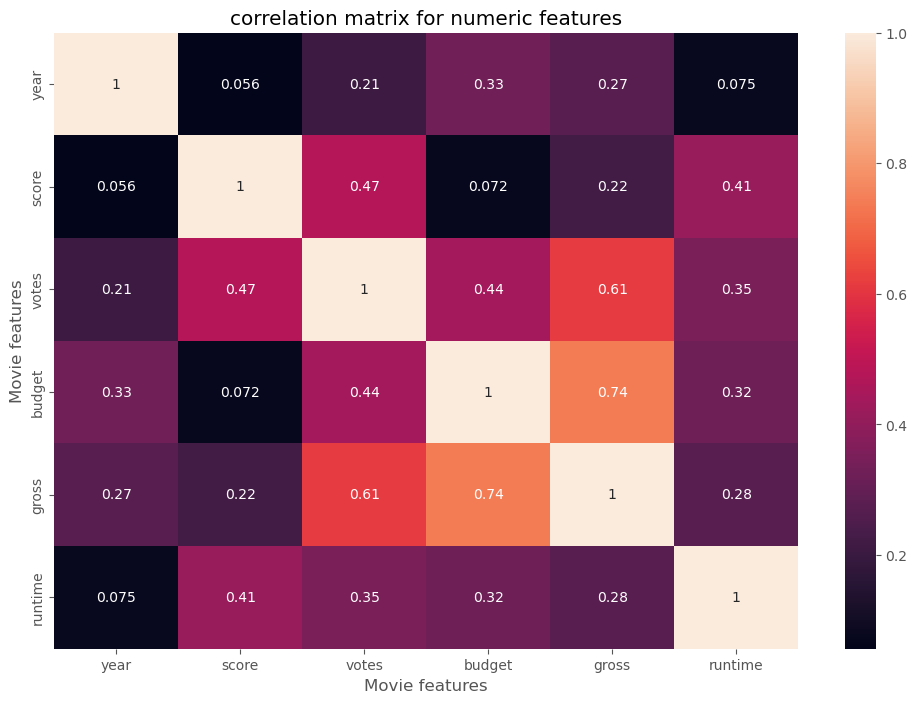

In [104]:
#high correlation betwn gross and budget
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation matrix for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()